<a href="https://colab.research.google.com/github/KauaHenSilva/python_deep_dream/blob/main/image_segmentation_with_mask_r_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bibliotecas

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Carregamento da rede neural convolucional pré-treinada

In [4]:
modelo = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
modelo.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, None, None, 32) │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, None, None, 32) │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, None, None, 32) │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, None, None, 32) │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, None, None, 32) │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, None, None, 32) │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, None, None, 64) │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, None, None, 64) │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, None, None, 64) │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, None, None, 64) │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, None, None, 80) │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, None, None, 80) │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, None, None, 80) │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, None, None,     │        138,240 │ activation_3[0][0]     │
│                           │ 192)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, None, None,     │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │ 192)                   │                │                        │
├──────────────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [5]:
len(modelo.layers)

311

In [6]:
# names = ['mixed3', 'mixed5', 'mixed8', 'mixed9']
names = ['mixed3', 'mixed5']

In [7]:
modelo.input

<KerasTensor shape=(None, None, None, 3), dtype=float32, sparse=None, name=keras_tensor>

In [8]:
layers = [modelo.get_layer(name).output for name in names]
layers

[<KerasTensor shape=(None, None, None, 768), dtype=float32, sparse=False, name=keras_tensor_100>,
 <KerasTensor shape=(None, None, None, 768), dtype=float32, sparse=False, name=keras_tensor_164>]

In [9]:
deep_dream_model = tf.keras.Model(modelo.input, layers)
deep_dream_model.output

[<KerasTensor shape=(None, None, None, 768), dtype=float32, sparse=False, name=keras_tensor_100>,
 <KerasTensor shape=(None, None, None, 768), dtype=float32, sparse=False, name=keras_tensor_164>]

### Carregamento e pré-processamento da imagem

In [1]:
from google.colab import drive

# drive: https://drive.google.com/drive/folders/1EUdRpr5YXNgffO9qg4pY0243__Tz5PQC?usp=drive_link
drive.mount('/content/drive')

Mounted at /content/drive


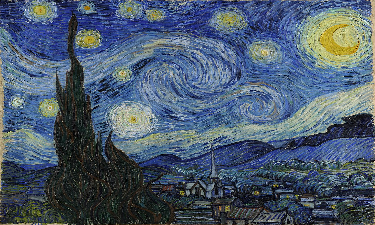

In [13]:
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Visão Computacional Guia Completo/Images/StaryNight.jpg', target_size=(225, 375))
img

In [16]:
type(img)

PIL.Image.Image

In [15]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
type(img_array)

numpy.ndarray

In [17]:
img_array.min(), img_array.max()

(0.0, 255.0)

In [18]:
# img_array /= 255
imagem_pre = tf.keras.applications.inception_v3.preprocess_input(img_array)
imagem_pre.min(), imagem_pre.max()

(-1.0, 1.0)